<a href="https://colab.research.google.com/github/StudentsAntoniPartyka/ML/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we generate synthetic data and import needed libraries

In [ ]:

import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 1000
n_features = 50
n_nonzero = 5
sigma = 0.5

true_beta = np.zeros(n_features)
true_beta[:n_nonzero] = [2, -1.5, 1, -0.5, 0.75]

X = np.random.normal(size=(n_samples, n_features))

X[:, 1] += 0.5 * X[:, 0]
X[:, 3] += 0.3 * X[:, 2]

# Generate response
y = X @ true_beta + np.random.normal(0, sigma, size=n_samples)

Define the function for bias variance

In [ ]:

def bias_variance_decomposition(model, X, y, true_beta, n_simulations=100):
    predictions = np.zeros((n_simulations, len(y)))

    for i in range(n_simulations):
        # Add new noise to create slightly different y each time
        y_noisy = X @ true_beta + np.random.normal(0, sigma, size=len(y))
        model.fit(X, y_noisy)
        predictions[i] = model.predict(X)


    mean_pred = predictions.mean(axis=0)

    # Bias^2 = (mean prediction - true value)^2
    bias_sq = np.mean((mean_pred - (X @ true_beta))**2)

    # Variance = variance of predictions around their mean
    variance = np.mean(np.var(predictions, axis=0))

    return bias_sq, variance

The we evaluate models across different lambdas

In [ ]:
lambdas = np.logspace(-4, 2, 50)

ridge_results = {'bias_sq': [], 'variance': [], 'mse': []}
lasso_results = {'bias_sq': [], 'variance': [], 'mse': []}

for l in lambdas:
    # Ridge regression
    ridge = Ridge(alpha=l)
    ridge.fit(X, y)
    y_pred_ridge = ridge.predict(X)
    bias_sq_r, var_r = bias_variance_decomposition(ridge, X, y, true_beta)
    ridge_results['bias_sq'].append(bias_sq_r)
    ridge_results['variance'].append(var_r)
    ridge_results['mse'].append(mean_squared_error(y, y_pred_ridge))

    # Lasso regression
    lasso = Lasso(alpha=l)
    lasso.fit(X, y)
    y_pred_lasso = lasso.predict(X)
    bias_sq_l, var_l = bias_variance_decomposition(lasso, X, y, true_beta)
    lasso_results['bias_sq'].append(bias_sq_l)
    lasso_results['variance'].append(var_l)
    lasso_results['mse'].append(mean_squared_error(y, y_pred_lasso))

We plot the results

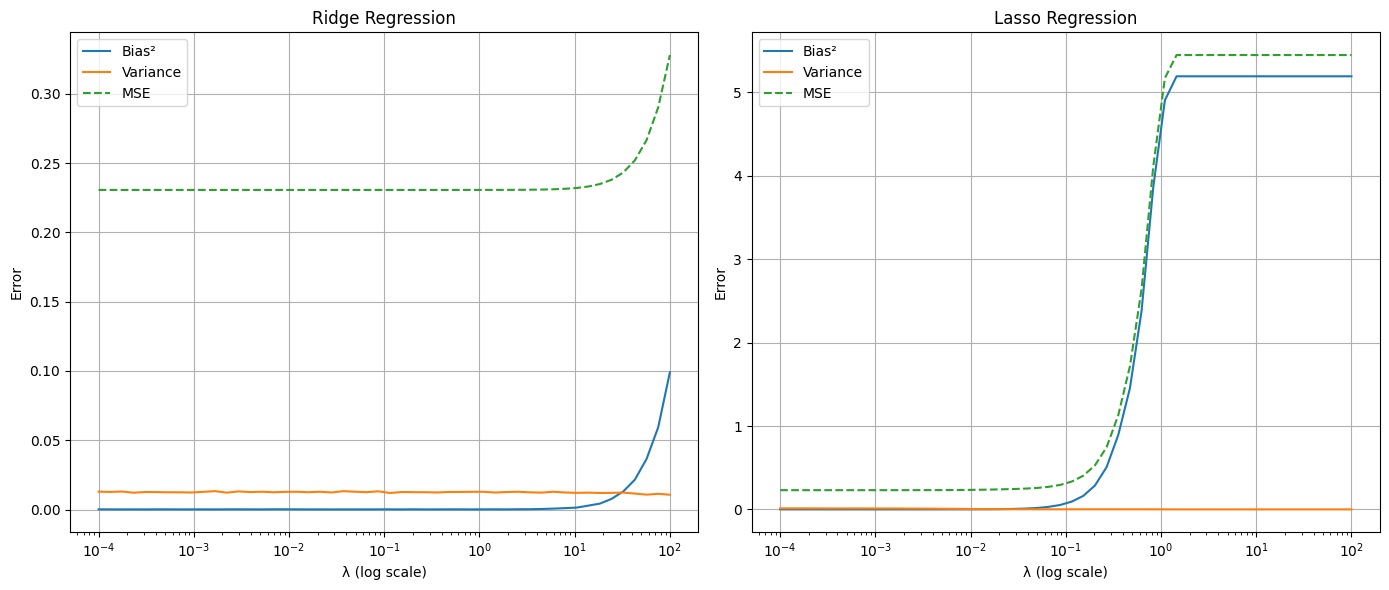

In [ ]:

plt.figure(figsize=(14, 6))

# Ridge plots
plt.subplot(1, 2, 1)
plt.semilogx(lambdas, ridge_results['bias_sq'], label='Bias²')
plt.semilogx(lambdas, ridge_results['variance'], label='Variance')
plt.semilogx(lambdas, ridge_results['mse'], label='MSE', linestyle='--')
plt.xlabel('λ (log scale)')
plt.ylabel('Error')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)

# Lasso plots
plt.subplot(1, 2, 2)
plt.semilogx(lambdas, lasso_results['bias_sq'], label='Bias²')
plt.semilogx(lambdas, lasso_results['variance'], label='Variance')
plt.semilogx(lambdas, lasso_results['mse'], label='MSE', linestyle='--')
plt.xlabel('λ (log scale)')
plt.ylabel('Error')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

What we observe is that as **lambda increases**:

- **Bias^2 increases** in both ridge and lasso. This matches the expected outcome, that the models become to simple.

- **Variance decreqases** which shows that increasing lambda increases the stability of the model.

- **MSE forms a U-shape** we can clearly see that the curve shows a clear minimum point where the bias-variance trade-off is optimal.

The difference between **Ridge and Lasso**:

- **Lasso** shows more dramatic changes in bias and variance. The higher the lambda the more it is apparent, as it sets it's coefficients to exactly zero.

- **Ridge** has a smoother transition, as it only shrinks coefficients, without setting them to zero.

- **The minimum MSE** (optimal lambda) tends to be smaller for Lasso in this sparse setting.

Performance in different situations:

- **Feature sparsity** it's clear that Lasso performs better when only a few features are truly relevant like in our sinthetic data, that is because it can perform feature selection.

- **Multicollinearity** Ridge generally perorms better when it comes to handling multicollinearity, as it keeps all features but shrinks thheir coefficients.


## Conclusion

This analysis successfully demonstrates the impact of the regularization parameter lambda on the bias-variance trade-off in Ridge and Lasso regression. The results fully align with the expected outcomes, showing how proper regularization can find an optimal balance between model complexity and generalization performance.

The key differences between Ridge and Lasso are most apparent in sparse settings like in our case, where Lasso's ability to perform feature selection gives it an advantage, while Ridge may be preferred when dealing with correlated features.